In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv("data/UCI_Credit_Card.csv")

In [87]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [90]:
len(df[df.duplicated()])

0

In [91]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [92]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [93]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

## Data processing

In [94]:
df.rename(columns={'default.payment.next.month' : 'Is_Defaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [95]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [96]:
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'Is_Defaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [97]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


# EDA

In [98]:
# dependant variable

In [99]:
## Is_Defaulter

In [100]:
df['Is_Defaulter'].value_counts()

Is_Defaulter
No     23364
Yes     6636
Name: count, dtype: int64

<Axes: xlabel='Is_Defaulter', ylabel='count'>

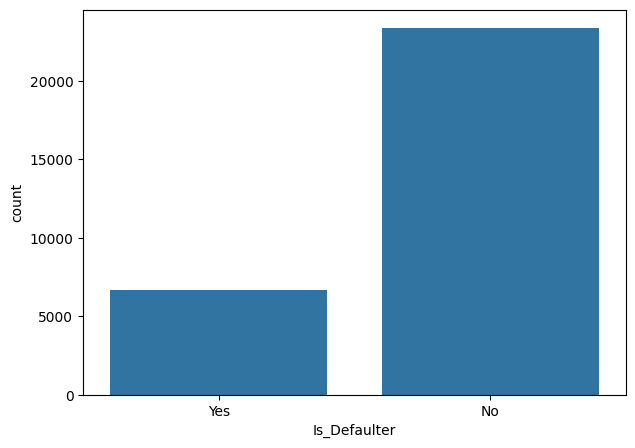

In [101]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Is_Defaulter', data = df)

In [102]:
## Independent variables

In [103]:
# In Education adding up the others values of 5,6,0 in the feature category 4
fil = (df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 4)
df.loc[fil, 'EDUCATION'] = 'Others'

In [104]:
# Adding the others category up in one feature
#Value counts for marriage category
fil = df['MARRIAGE']==0
df.loc[fil,'MARRIAGE'] = 'Others'

SEX
Female    18112
Male      11888
Name: count, dtype: int64


EDUCATION
University         14030
Graduate School    10585
High School         4917
Others               468
Name: count, dtype: int64


MARRIAGE
Single     15964
Married    13659
Others       377
Name: count, dtype: int64




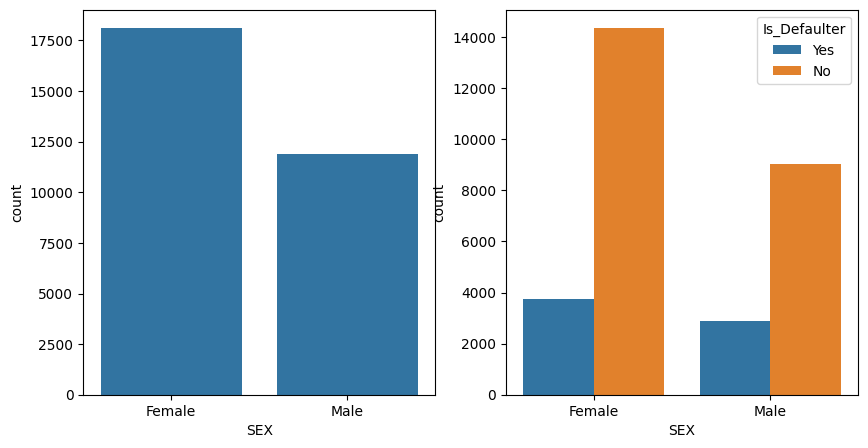

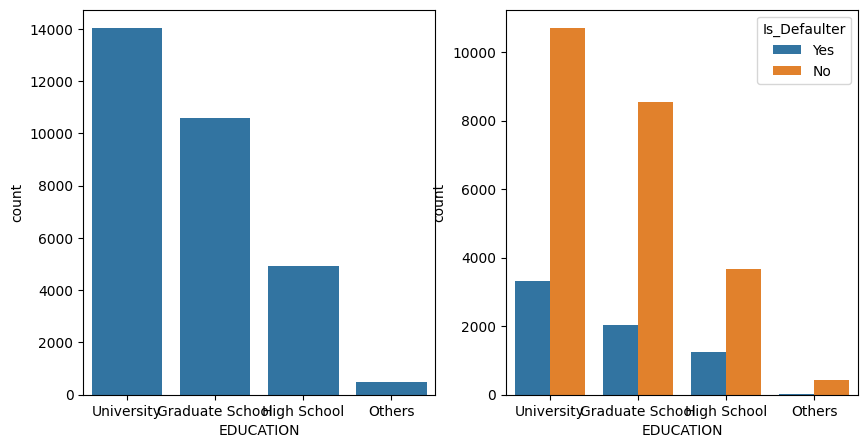

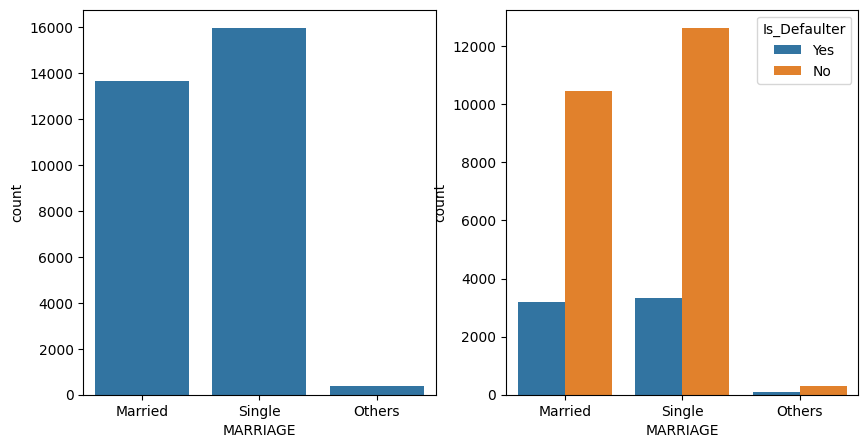

In [105]:
# Categorical
Categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
for feature in Categorical_features:
    value_count = df[feature].value_counts()
    print(value_count)
    print("\n")

for feature in Categorical_features:
   fig, axes = plt.subplots(ncols=2,figsize=(10,5))
   sns.countplot(x = feature, ax = axes[0], data = df)
   sns.countplot(x = feature, hue = 'Is_Defaulter',ax = axes[1], data = df)

In [106]:
#age wise values of credit card holder
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

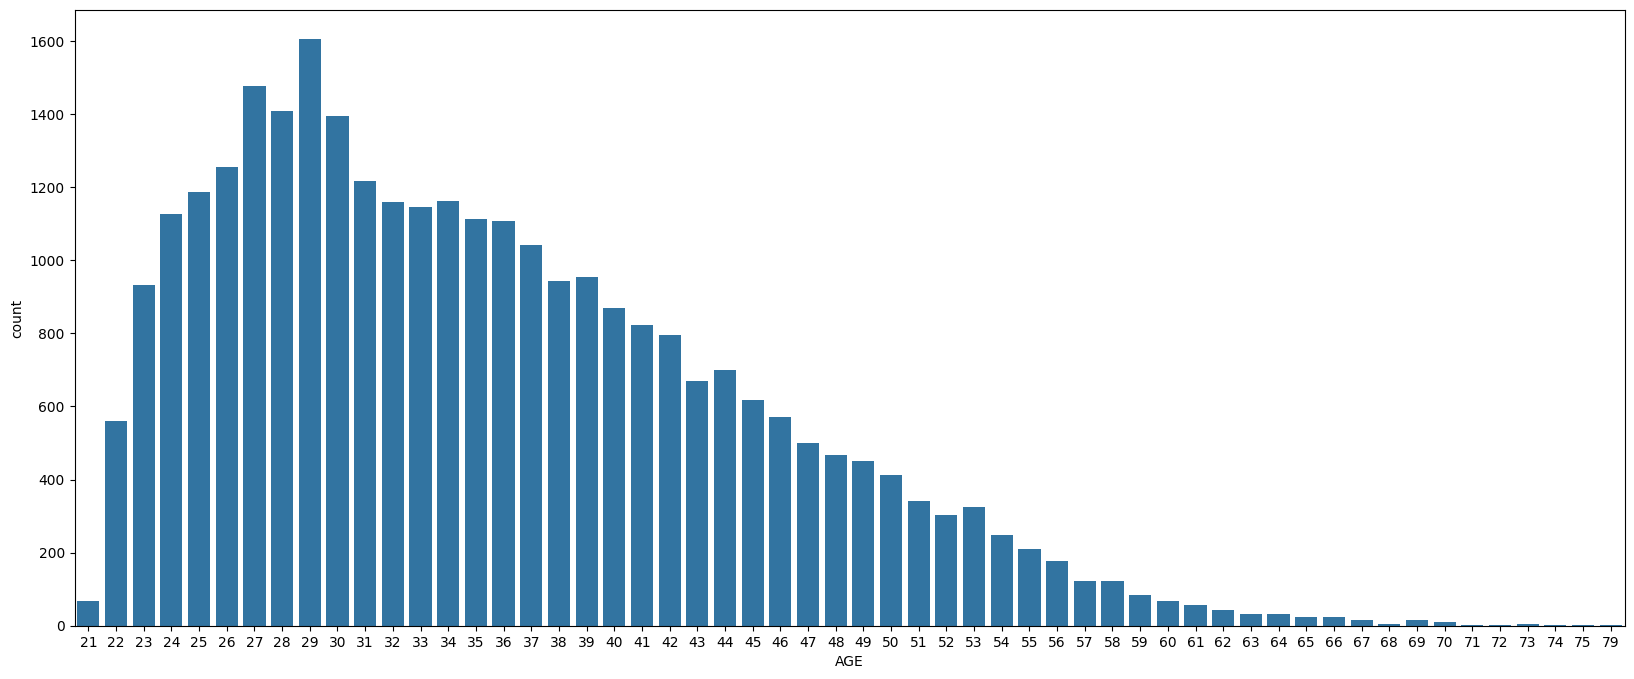

In [107]:
#values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

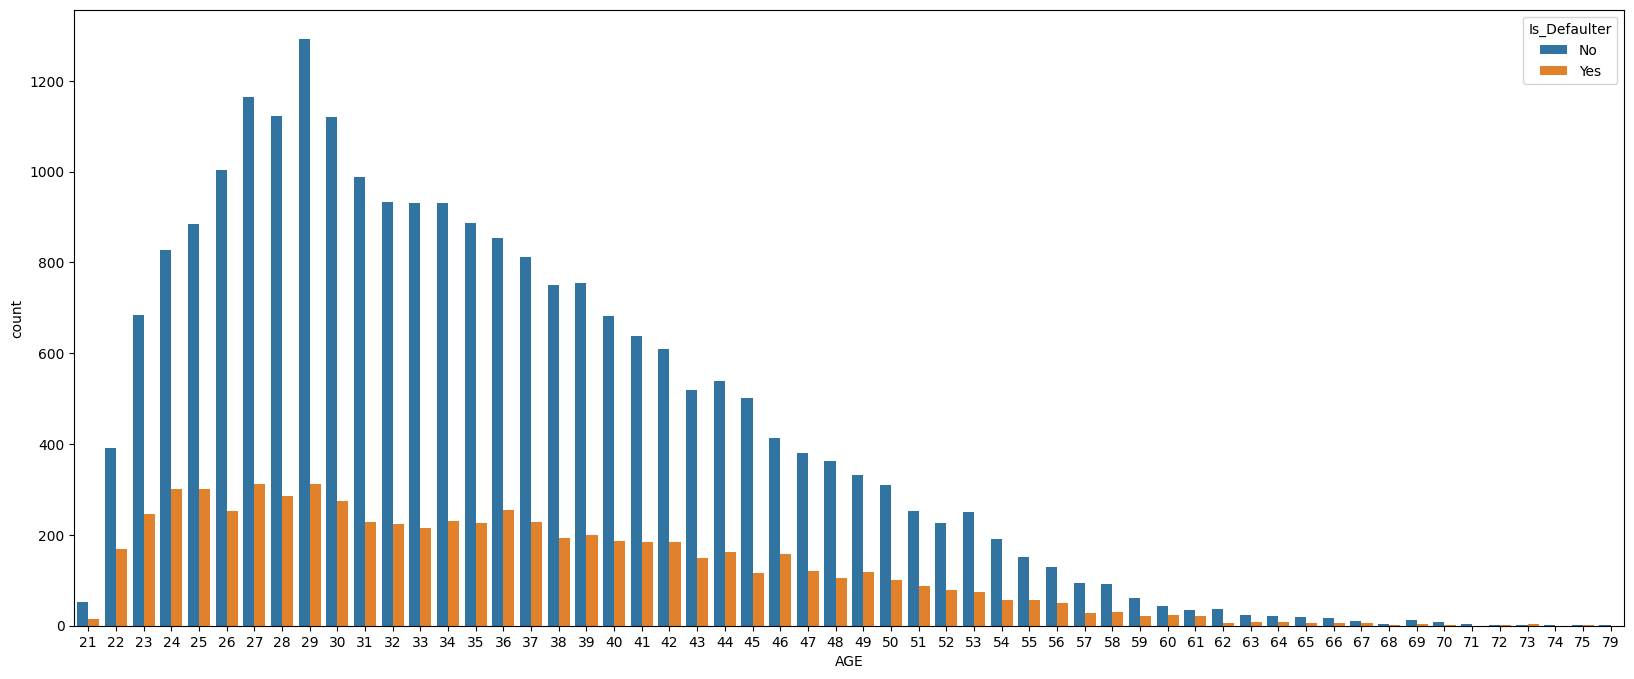

In [108]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'Is_Defaulter', data = df)

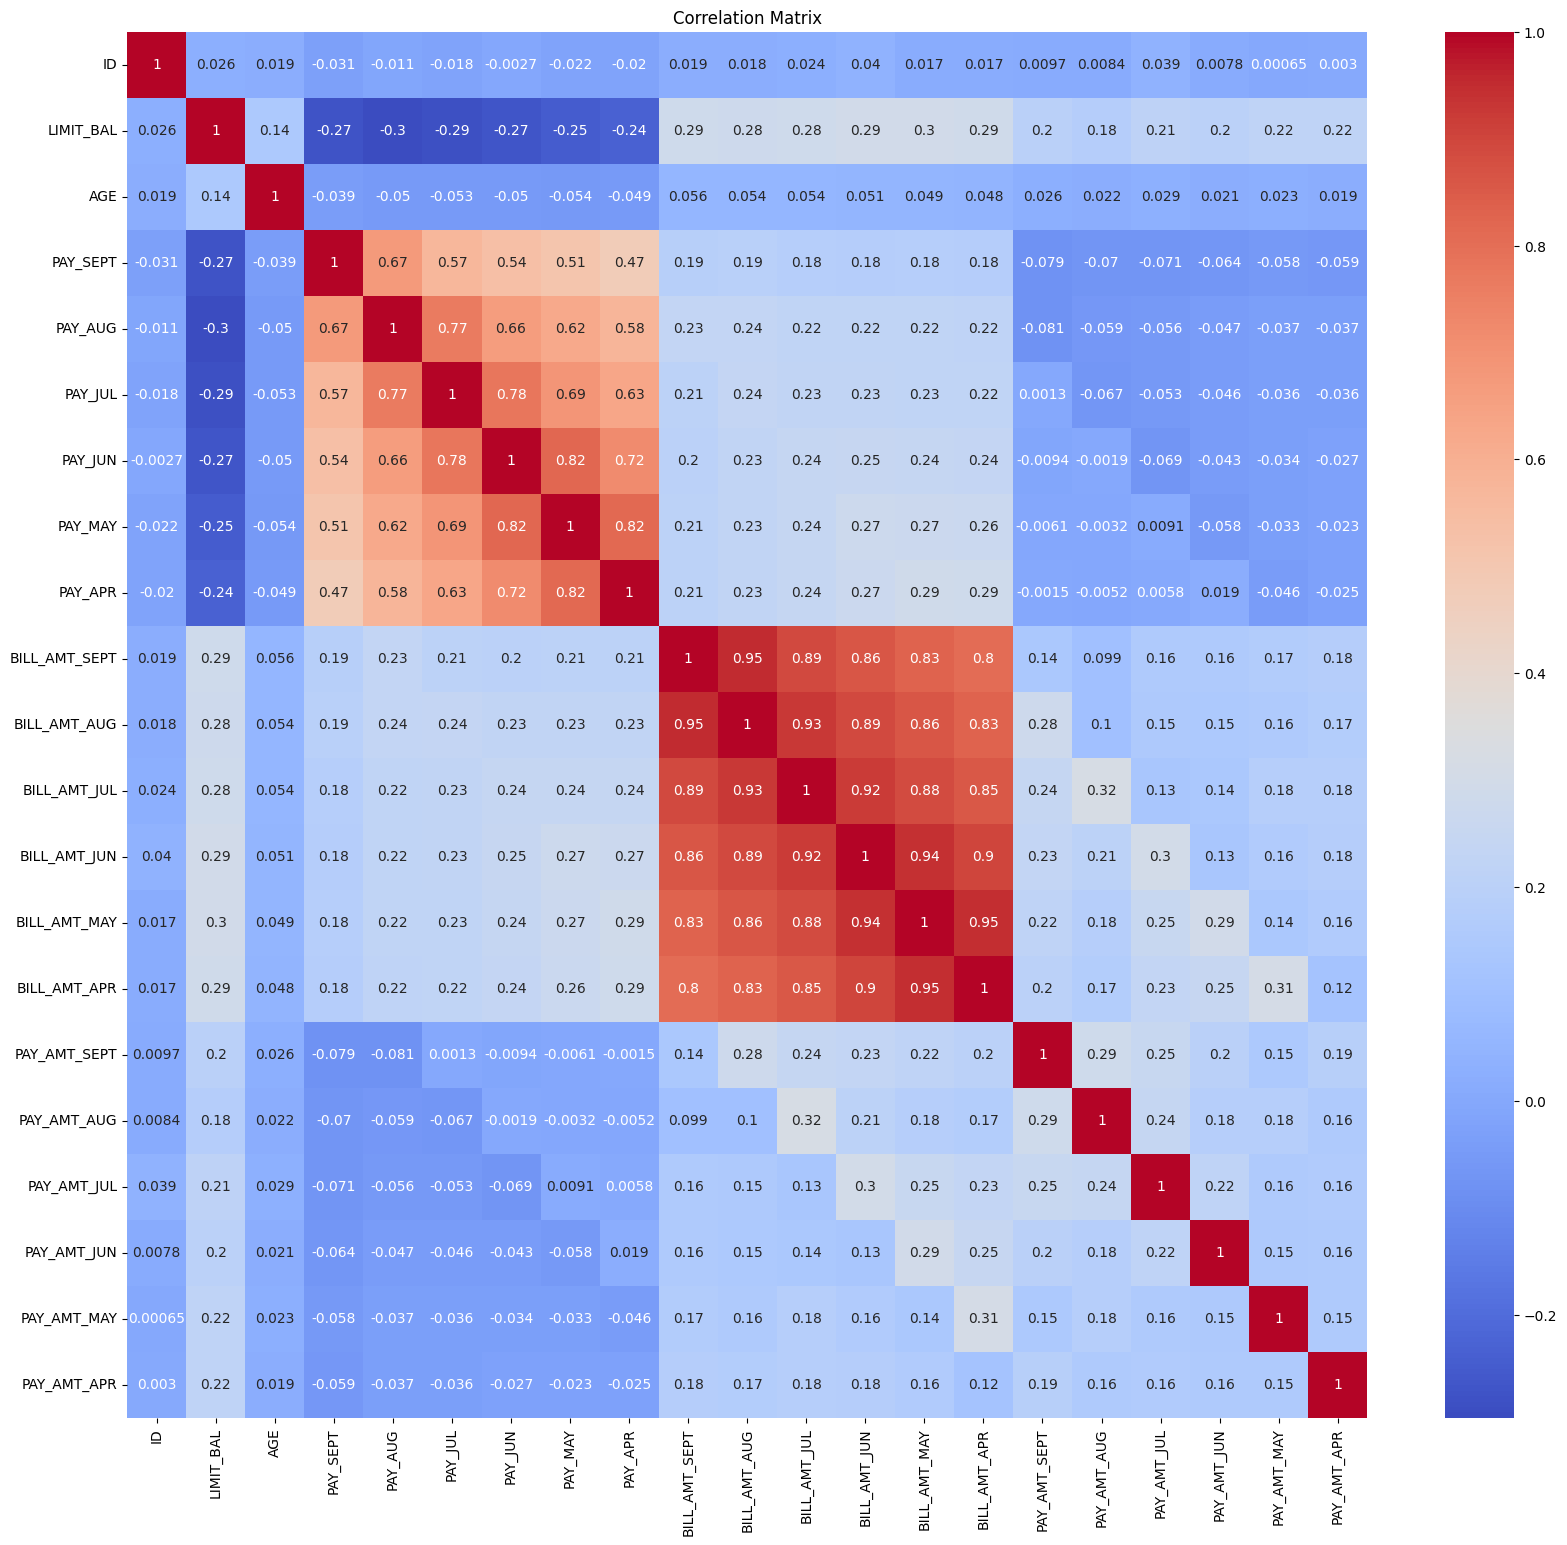

In [109]:
plt.figure(figsize=(20,18))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

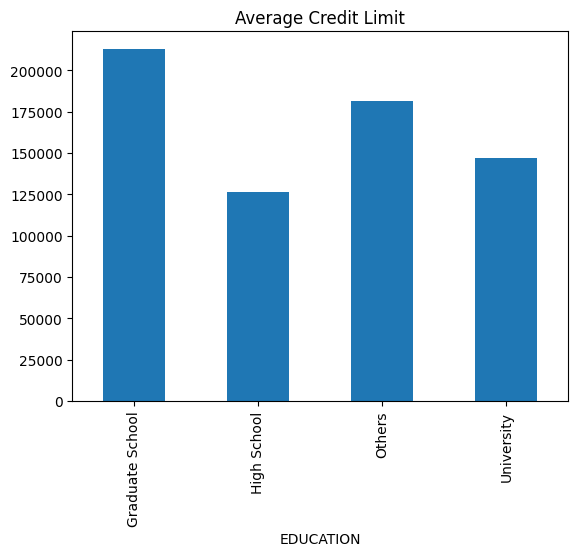

In [110]:
#group by EDUCATION and calculate average LIMIT_BAL
education_limit_bal = df.groupby('EDUCATION')['LIMIT_BAL'].mean().plot(kind='bar')
plt.title('Average Credit Limit')
plt.show()

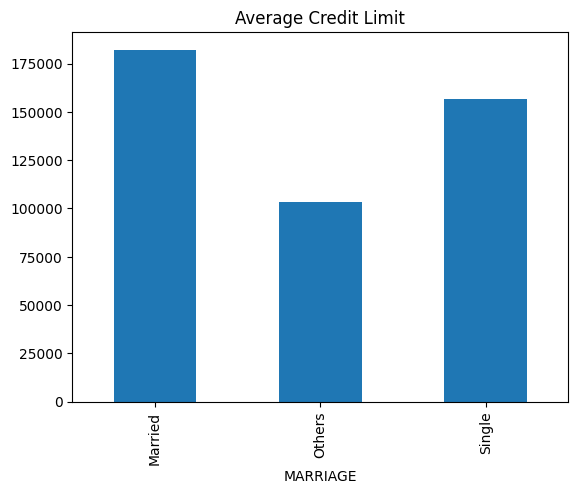

In [111]:
#group by MARRAIGE and calculate average LIMIT_BAL
education_limit_bal = df.groupby('MARRIAGE')['LIMIT_BAL'].mean().plot(kind='bar')
plt.title('Average Credit Limit')
plt.show()

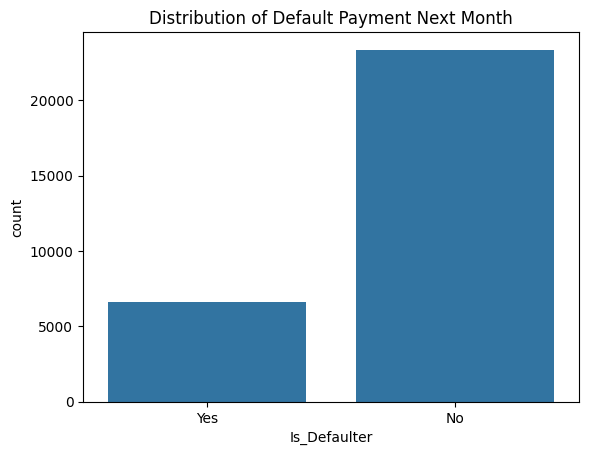

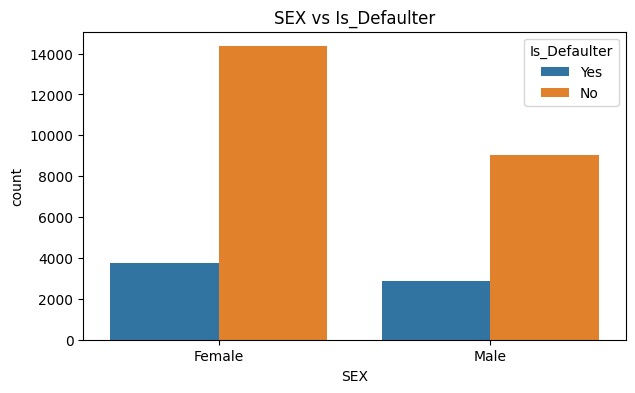

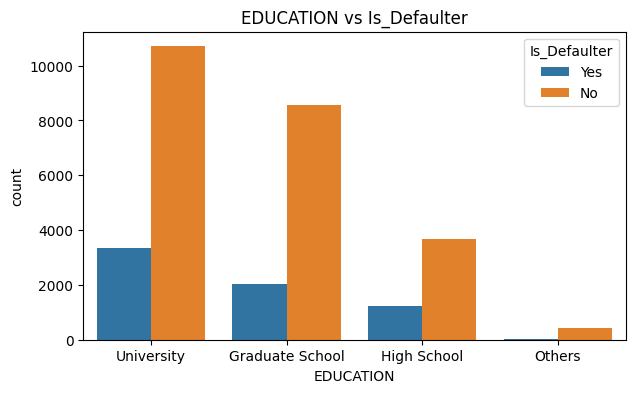

In [112]:
#distribution of traget variable 
sns.countplot(x='Is_Defaulter', data=df)
plt.title('Distribution of Default Payment Next Month')
plt.show()

for feature in Categorical_features[:-1]:
    plt.figure(figsize=(7,4))
    sns.countplot(x=feature, hue= 'Is_Defaulter', data=df)
    plt.title(f'{feature} vs Is_Defaulter')
    plt.show()
    

In [113]:
df.shape

(30000, 25)

# One Hot Encoding

In [114]:
#Label encoding 
encode_num = {"SEX":{"Female":0,"Male":1}, "Is_Defaulter":{"Yes":1,"No":0}}
df=df.replace(encode_num)

In [115]:
#check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter
0,1,20000.0,0,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [116]:
#creating dummy variables
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE']) 

In [117]:
df.shape

(30000, 30)

In [118]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [119]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Is_Defaulter,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,1,False,False,True,True,False
1,2,120000.0,0,26,-1,2,0,0,0,2,...,1000.0,1000.0,0.0,2000.0,1,False,False,True,False,True
2,3,90000.0,0,34,0,0,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,False,False,True,False,True
3,4,50000.0,0,37,0,0,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,False,False,True,True,False
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,10000.0,9000.0,689.0,679.0,0,False,False,True,True,False


In [120]:
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [121]:
df.shape

(30000, 80)

In [122]:
#checking all variables
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,0,0,0,0,1
AGE,24,26,34,37,57
BILL_AMT_SEPT,3913.0,2682.0,29239.0,46990.0,8617.0
...,...,...,...,...,...
PAY_APR_4,False,False,False,False,False
PAY_APR_5,False,False,False,False,False
PAY_APR_6,False,False,False,False,False
PAY_APR_7,False,False,False,False,False


## Handling class imbalance

### SMOTE - Synthetic Minority Oversampling Technique

In [123]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'Is_Defaulter')], df['Is_Defaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [124]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Is_Defaulter'))

In [125]:
#adding target variable to new created dataframe
balanced_df['Is_Defaulter'] = y_smote

<Axes: xlabel='Is_Defaulter', ylabel='count'>

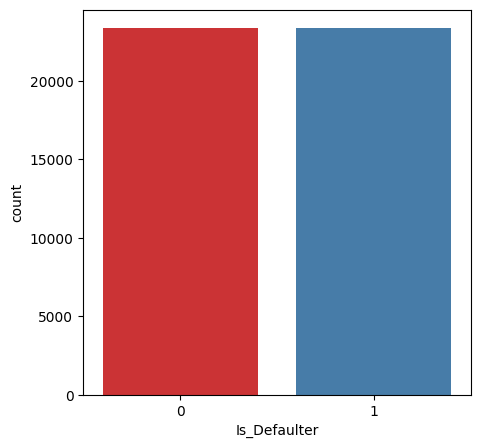

In [126]:
#checking for class imbalance
plt.figure(figsize=(5,5))
sns.countplot(x = 'Is_Defaulter', data = balanced_df, palette = "Set1" )

In [127]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [128]:
#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [129]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,Is_Defaulter
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,1
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,False,False,True,False,False,False,False,False,False,1
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,False,True,False,False,False,False,False,False,False,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,False,True,False,False,False,False,False,False,False,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,False,True,False,False,False,False,False,False,False,0


In [130]:
balanced_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,46728.0,153946.331547,125521.892126,10000.0,50000.000000,120000.000000,220000.000000,1000000.0
SEX,46728.0,0.323382,0.467772,0.0,0.000000,0.000000,1.000000,1.0
AGE,46728.0,35.435520,8.818656,21.0,28.000000,34.000000,41.000000,79.0
BILL_AMT_SEPT,46728.0,50067.053872,72896.594505,-165580.0,3333.000000,21636.924166,64210.935294,964511.0
BILL_AMT_AUG,46728.0,48423.035566,70818.169895,-69777.0,2840.930373,20825.250164,61596.005513,983931.0
BILL_AMT_JUL,46728.0,46368.184531,68751.817937,-157264.0,2549.957282,20056.181356,58603.250000,1664089.0
BILL_AMT_JUN,46728.0,42871.254441,64141.230129,-170000.0,2192.079027,19085.000000,52705.590326,891586.0
BILL_AMT_MAY,46728.0,40174.607968,61071.140359,-81334.0,1668.517769,18329.939838,49395.244806,927171.0
BILL_AMT_APR,46728.0,38880.372470,59703.952811,-339603.0,1262.235013,17513.027872,48670.163595,961664.0
PAY_AMT_SEPT,46728.0,4725.080006,14000.430094,0.0,631.750000,2000.000000,4460.500000,873552.0


In [131]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'Is_Defaulter'))]
y = balanced_df['Is_Defaulter']

In [132]:
print(X.columns)

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'EDUCATION_Graduate School',
       'EDUCATION_High School', 'EDUCATION_University', 'MARRIAGE_Married',
       'MARRIAGE_Single', 'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1',
       'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6',
       'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1',
       'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6',
       'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1',
       'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6',
       'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1',
       'PAY_JUN_2', 'PAY_JUN_3', 'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6',
       'PAY_JUN_7', 'PAY_JUN_8', 'PAY_MAY_-1', 'PAY_MAY_0', 'PAY_MAY_

In [133]:
X.shape

(46728, 78)

In [134]:
y.shape

(46728,)

In [135]:
df = balanced_df

# Data Transformation

In [53]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [55]:
X_train.shape

(37382, 78)

In [56]:
X_test.shape

(9346, 78)

# MODEL TRAINING

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#modelling
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

## Logistic Regression

In [58]:
#fitting data into Logistic Regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [59]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [60]:
#getting all score for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 4)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 4)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 4)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 4)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 4)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 4)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.8605
The accuracy on test data is  0.8622
The precision on test data is  0.7849
The recall on test data is  0.9284
The f1 on test data is  0.8506
The roc_score on test data is  0.871


[[4390  283]
 [1005 3668]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

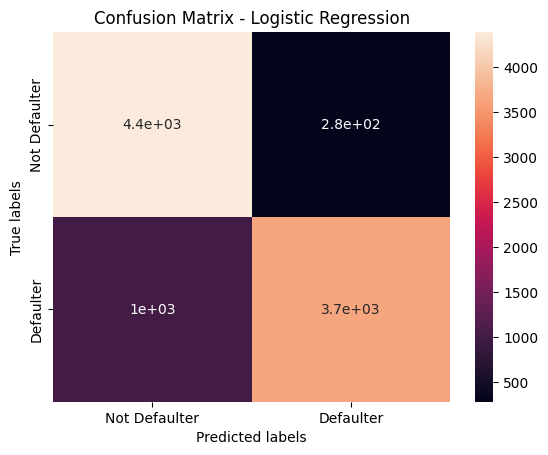

In [61]:
#Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Decision Tree

In [62]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [64]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.817
The precision on test data is  0.825
The recall on test data is  0.811
The f1 on test data is  0.818
The roc_score on test data is  0.817


[[3776  897]
 [ 816 3857]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

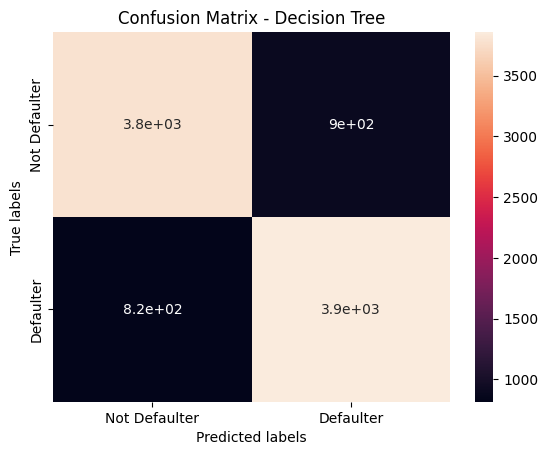

In [65]:
# Get the confusion matrix for desicion tree
labels = ['Not Defaulter', 'Defaulter']
cm_dt = confusion_matrix(y_test, y_pred_dtc )
print(cm_dt)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dt, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Random Forest Classifier

In [66]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [67]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [68]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  0.999
The accuracy on test data is  0.878
The precision on test data is  0.84
The recall on test data is  0.909
The f1 on test data is  0.873
The roc_score on test data is  0.88


[[4282  391]
 [ 750 3923]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

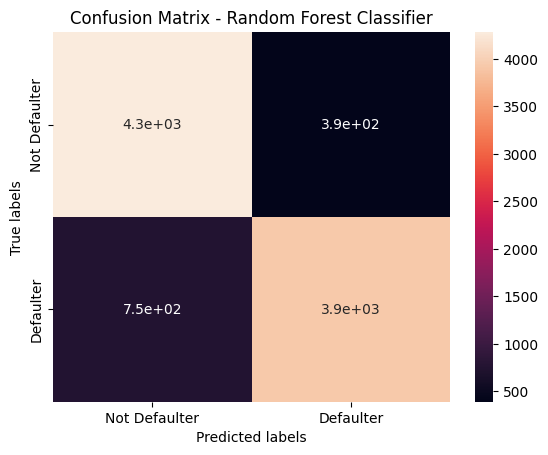

In [69]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Gradient Boosting 

In [70]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [71]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [72]:

#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.866
The accuracy on test data is  0.864
The precision on test data is  0.792
The recall on test data is  0.924
The f1 on test data is  0.853
The roc_score on test data is  0.871


[[4369  304]
 [ 970 3703]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

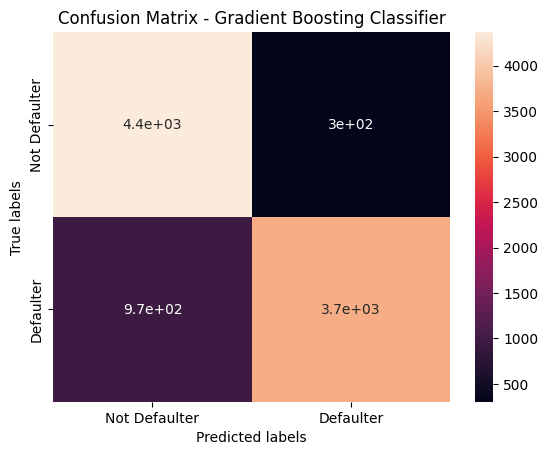

In [73]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## XG Boosting

In [74]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [76]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.912
The accuracy on test data is  0.87
The precision on test data is  0.81
The recall on test data is  0.921
The f1 on test data is  0.862
The roc_score on test data is  0.875


[[4347  326]
 [ 889 3784]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

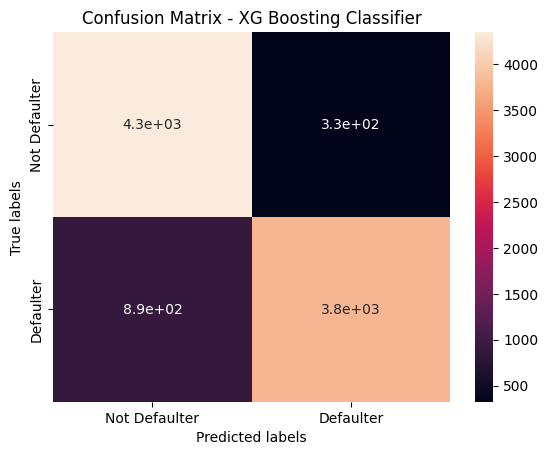

In [77]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## baseline model comparision

In [78]:
all_classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_gbc, roc_score_xgb]

In [79]:
compare_df = pd.DataFrame({'Classifier':all_classifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [80]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.8605,0.8622,0.7849,0.9284,0.8506,0.871
1,Decision Tree,1.0000,0.8170,0.8250,0.8110,0.8180,0.817
2,Random Forest,0.9990,0.8780,0.8400,0.9090,0.8730,0.880
3,Gradient Boosting,0.8660,0.8640,0.7920,0.9240,0.8530,0.871
4,XG Boosting,0.9120,0.8700,0.8100,0.9210,0.8620,0.875


In [81]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,0.9990,0.8780,0.8400,0.9090,0.8730,0.880
4,XG Boosting,0.9120,0.8700,0.8100,0.9210,0.8620,0.875
3,Gradient Boosting,0.8660,0.8640,0.7920,0.9240,0.8530,0.871
0,Logistic Regression,0.8605,0.8622,0.7849,0.9284,0.8506,0.871
1,Decision Tree,1.0000,0.8170,0.8250,0.8110,0.8180,0.817


# ROC CURVE for all the models

In [82]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]

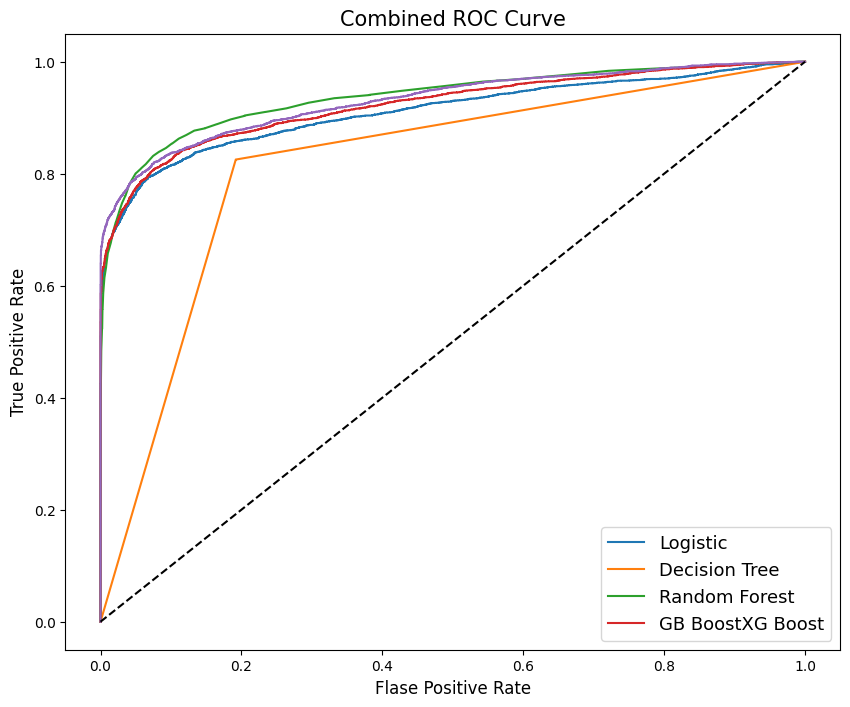

In [83]:
fig = plt.figure(figsize=(10,8)) 

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# Feature Importance on Random Forest Model

In [84]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'Is_Defaulter')

feature_importances_rfc = rfc.feature_importances_

feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

feature_importances_rfc_df.sort_values(ascending=False)[0:15]

ValueError: Length of values (78) does not match length of index (79)

In [ ]:
fig = plt.figure(figsize=(12,7)) 
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

# Cross Validation and Hyperparameter Tuning

## Logistic regression

In [ ]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [ ]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

In [ ]:
logi_grid.best_estimator_

In [ ]:
logi_grid.best_params_

In [ ]:
logi_optimal_model = logi_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

In [ ]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [ ]:
train_cm_logi_grid

In [ ]:
test_cm_logi_grid

# Decision Tree Classification

In [ ]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [ ]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

In [ ]:
dtc_grid.best_estimator_

In [ ]:
dtc_grid.best_params_

In [ ]:
dtc_optimal_model = dtc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

In [ ]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [ ]:
train_cm_dtc_grid

In [ ]:
test_cm_dtc_grid

# Random Forest Classsifier

In [ ]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

In [ ]:
rfc_grid.best_estimator_

In [ ]:
rfc_grid.best_params_

In [ ]:
rfc_optimal_model = rfc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

In [ ]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [ ]:
train_cm_rfc_grid

In [ ]:
test_cm_rfc_grid

# Gradient Boosting

In [ ]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

In [ ]:
gbc_grid.best_estimator_

In [ ]:
gbc_grid.best_params_

In [ ]:
gbc_optimal_model = gbc_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

In [ ]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [ ]:
train_cm_gbc_grid

In [ ]:
test_cm_gbc_grid

# XG Boosting

In [ ]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [ ]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

In [ ]:
xgb_grid.best_estimator_

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_

In [ ]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

In [ ]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

# Comparing all the finals models

In [ ]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_gbc_grid, auc_xgb_grid]

In [ ]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [ ]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [ ]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [ ]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [ ]:
all_comparision_df